In [2]:
# 1. Create model to predict rating
# 2. Create model to predict box office earnings
# 3. For both models, try linear regression, then random forest regressor

In [788]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_excel('../movies.xlsx', index_col=0)
titles = df.index.tolist()

omdb_df = pd.read_json('omdb_data.json')
omdb_df = omdb_df.set_index("Title")



trend_df = pd.read_json("./trends_data.json", orient='table')
trend_df.drop("isPartial", axis=1)


trend_df2 = pd.read_json("./trends_data_2.json", orient='table')
trend_df2_raw = trend_df2.copy()
trend_df2 = trend_df2.groupby("Title").sum()

# Compute metrics for trend_df

    
avg_df = trend_df.groupby(level=0).mean()
std_df = trend_df.groupby(level=0).std()
max_df = trend_df.groupby(level=0).max()
min_df = trend_df.groupby(level=0).min()
# Use a 4 week rolling window
rolling_max_df = trend_df.groupby(level=0,group_keys=False).apply(lambda x: x.rolling(window=4).sum())
rolling_max_df = rolling_max_df.groupby(level=0,group_keys=False).max()


In [805]:
# Merge

df1 = omdb_df.copy()
df1 = df1.merge(avg_df['searches'], how='left', left_index=True, right_index=True)
df1 = df1.rename(columns={"searches": "searches_avg"})
df1 = df1.merge(std_df['searches'], how='left', left_index=True, right_index=True)
df1 = df1.rename(columns={"searches": "searches_std"})
df1 = df1.merge(max_df['searches'], how='left', left_index=True, right_index=True)
df1 = df1.rename(columns={"searches": "searches_max"})
df1 = df1.merge(min_df['searches'], how='left', left_index=True, right_index=True)
df1 = df1.rename(columns={"searches": "searches_min"})
df1 = df1.merge(rolling_max_df['searches'], how='left', left_index=True, right_index=True)
df1 = df1.rename(columns={"searches": "searches_rolling_max"})
df1 = df1.merge(trend_df2['searches'], how='left', left_index=True, right_index=True)
df1 = df1.rename(columns={"searches": "searches_sum"})

with pd.ExcelWriter('movies.xlsx', mode='a', if_sheet_exists='replace') as writer:
    df1.to_excel(writer, sheet_name='agg')
    
df1.head()



,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,searches_avg,searches_std,searches_max,searches_min,searches_rolling_max,searches_sum
Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
The Age of Adaline,2015,PG-13,24 Apr 2015,112 min,"Drama, Fantasy, Romance",Lee Toland Krieger,"J. Mills Goodloe, Salvador Paskowitz","Blake Lively, Michiel Huisman, Harrison Ford","A young woman, born at the turn of the 20th ce...","English, Portuguese, Italian","United States, Canada",1 win & 10 nominations,https://m.media-amazon.com/images/M/MV5BMTAzMT...,"[{'Source': 'Internet Movie Database', 'Value'...",51,7.2,"186,370",tt1655441,movie,08 Sep 2015,"$42,629,776",N/A,N/A,True,24.641509,23.751190,100.0,5.0,345.0,10374.0
Black Christmas,1974,R,20 Dec 1974,98 min,"Horror, Mystery, Thriller",Bob Clark,Roy Moore,"Olivia Hussey, Keir Dullea, Margot Kidder","During their Christmas break, a group of soror...",English,Canada,3 wins & 2 nominations,https://m.media-amazon.com/images/M/MV5BYTllYW...,"[{'Source': 'Internet Movie Database', 'Value'...",65,7.1,"43,766",tt0071222,movie,05 Dec 2006,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN,NaN,NaN
London,2005,R,03 Jul 2021,92 min,"Drama, Romance",Hunter Richards,Hunter Richards,"Jessica Biel, Chris Evans, Jason Statham",London is a drug laden adventure that centers ...,English,"United Kingdom, United States",1 win & 1 nomination,https://m.media-amazon.com/images/M/MV5BMTc5Mz...,"[{'Source': 'Internet Movie Database', 'Value'...",24,6.4,"23,890",tt0449061,movie,23 May 2006,"$20,361",N/A,N/A,True,89.000000,5.677215,100.0,74.0,391.0,NaN
Twisted,2004,R,27 Feb 2004,97 min,"Crime, Drama, Mystery",Philip Kaufman,Sarah Thorp,"Ashley Judd, Samuel L. Jackson, Andy Garcia","Jessica, whose father killed her mother and co...","English, Italian, Spanish","United States, Germany",1 win,https://m.media-amazon.com/images/M/MV5BMTg1OT...,"[{'Source': 'Internet Movie Database', 'Value'...",26,5.3,"22,435",tt0315297,movie,31 Aug 2004,"$25,198,598","Summit Entertainment, Paramount Pictures",N/A,True,81.886792,8.863626,100.0,66.0,374.0,13324.0
Friends with Kids,2011,R,16 Mar 2012,107 min,"Comedy, Drama, Romance",Jennifer Westfeldt,Jennifer Westfeldt,"Jennifer Westfeldt, Adam Scott, Maya Rudolph",Two best friends decide to have a child togeth...,English,United States,2 nominations,https://m.media-amazon.com/images/M/MV5BMjIyMD...,"[{'Source': 'Internet Movie Database', 'Value'...",55,6.1,"42,670",tt1720616,movie,17 Jul 2012,"$7,251,073",Roadside Attractions,N/A,True,25.576923,17.938179,100.0,10.0,305.0,6856.0


In [722]:
# drop columns with more than 50% null values

threshold = 0.5
df1 = df1.replace("N/A", pd.NA)
df1 = df1.dropna(thresh=len(df1) * threshold, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, The Age of Adaline to What the Health
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  150 non-null    int64  
 1   Rated                 147 non-null    object 
 2   Released              150 non-null    object 
 3   Runtime               150 non-null    object 
 4   Genre                 150 non-null    object 
 5   Director              150 non-null    object 
 6   Writer                150 non-null    object 
 7   Actors                150 non-null    object 
 8   Plot                  150 non-null    object 
 9   Language              149 non-null    object 
 10  Country               150 non-null    object 
 11  Awards                128 non-null    object 
 12  Poster                150 non-null    object 
 13  Ratings               150 non-null    object 
 14  Metascore             132 non-null    object 
 15 

In [739]:
# Get all possible genres and rated
genres = set()
rated = set()

for genre in df1['Genre']:
    t = genre.split(",")
    new = set([a.strip() for a in t])
    genres = genres.union(new)
print(genres)

rated = list(df1["Rated"].dropna().unique())
print(rated)

{'Sci-Fi', 'Family', 'War', 'Romance', 'Drama', 'Horror', 'Documentary', 'Short', 'Crime', 'Fantasy', 'Mystery', 'Animation', 'Music', 'Adventure', 'Biography', 'History', 'Action', 'Sport', 'Comedy', 'Thriller'}
['PG-13', 'R', 'Not Rated', 'PG', 'Unrated', 'G', 'TV-G', 'TV-MA', 'TV-14', 'Approved', 'TV-PG', 'NC-17']


In [740]:
df1.count()

Year                    150
Rated                   147
Released                150
Runtime                 150
Genre                   150
Director                150
Writer                  150
Actors                  150
Plot                    150
Language                149
Country                 150
Awards                  128
Poster                  150
Ratings                 150
Metascore               132
imdbRating              150
imdbVotes               150
imdbID                  150
Type                    150
DVD                     145
BoxOffice               115
Response                150
searches_avg            105
searches_std            105
searches_max            105
searches_min            105
searches_rolling_max    105
searches_sum             77
dtype: int64

In [741]:
# Process numerical data
df2 = df1.copy()
df2['Runtime'] = df2['Runtime'].apply(lambda x: int(x.split()[0]) if x is not pd.NA else np.NaN)
df2['imdbVotes'] = df2['imdbVotes'].apply(lambda x: int( x.replace(",", "")) if x is not pd.NA else np.NaN)
df2['BoxOffice'] = df2['BoxOffice'].apply(lambda x: int( x.replace(",", "")[1:]) if x is not pd.NA else np.NaN)
df2['Metascore'] = df2['Metascore'].apply(lambda x: int(x)/100 if x is not pd.NA else np.NaN)
df2['Metascore'] = df2['imdbRating'].apply(lambda x: int(x)/10 if x is not pd.NA else np.NaN)

In [742]:
# Process datetime data

df2['Year'] = pd.to_datetime(df2["Year"])
df2['Released'] = pd.to_datetime(df2['Released'])
df2['DVD']= pd.to_datetime(df2['DVD'])

In [743]:
# Flatten ratings

def flatten_ratings(row):
    x = {s["Source"]: s["Value"] for s in row['Ratings'] if not isinstance(s, float)}
    
    if 'Rotten Tomatoes' in x:
        row['Rotten Tomatoes'] = float(x['Rotten Tomatoes'][:-1]) / 100
    else:
        row['Rotten Tomatoes'] = np.NaN 
    return row

df2 = df2.apply(flatten_ratings, axis = 1)

df2['log_imdbVotes'] = np.log(df2['imdbVotes'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, The Age of Adaline to What the Health
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  150 non-null    datetime64[ns]
 1   Rated                 147 non-null    object        
 2   Released              150 non-null    datetime64[ns]
 3   Runtime               150 non-null    int64         
 4   Genre                 150 non-null    object        
 5   Director              150 non-null    object        
 6   Writer                150 non-null    object        
 7   Actors                150 non-null    object        
 8   Plot                  150 non-null    object        
 9   Language              149 non-null    object        
 10  Country               150 non-null    object        
 11  Awards                128 non-null    object        
 12  Poster                150 non-null    object        
 

In [803]:
df_trends_df = pd.read_json("./trends_data_1.json", orient='table')

with pd.ExcelWriter('movies.xlsx', mode='a', if_sheet_exists='replace') as writer:
    omdb_df.to_excel(writer, sheet_name='omdb')
    trend_df.to_excel(writer, sheet_name='searches')
    trend_df2_raw.to_excel(writer, sheet_name='related_searches')
    df1.to_excel(writer, sheet_name='agg')
    df_trends_df.to_excel(writer, sheet_name='related_queries')

df1.head()


,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,searches_avg,searches_std,searches_max,searches_min,searches_rolling_max,searches_sum
Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
The Age of Adaline,2015,PG-13,24 Apr 2015,112 min,"Drama, Fantasy, Romance",Lee Toland Krieger,"J. Mills Goodloe, Salvador Paskowitz","Blake Lively, Michiel Huisman, Harrison Ford","A young woman, born at the turn of the 20th ce...","English, Portuguese, Italian","United States, Canada",1 win & 10 nominations,https://m.media-amazon.com/images/M/MV5BMTAzMT...,"[{'Source': 'Internet Movie Database', 'Value'...",51,7.2,"186,370",tt1655441,movie,08 Sep 2015,"$42,629,776",N/A,N/A,True,24.641509,23.751190,100.0,5.0,345.0,10374.0
Black Christmas,1974,R,20 Dec 1974,98 min,"Horror, Mystery, Thriller",Bob Clark,Roy Moore,"Olivia Hussey, Keir Dullea, Margot Kidder","During their Christmas break, a group of soror...",English,Canada,3 wins & 2 nominations,https://m.media-amazon.com/images/M/MV5BYTllYW...,"[{'Source': 'Internet Movie Database', 'Value'...",65,7.1,"43,766",tt0071222,movie,05 Dec 2006,N/A,N/A,N/A,True,NaN,NaN,NaN,NaN,NaN,NaN
London,2005,R,03 Jul 2021,92 min,"Drama, Romance",Hunter Richards,Hunter Richards,"Jessica Biel, Chris Evans, Jason Statham",London is a drug laden adventure that centers ...,English,"United Kingdom, United States",1 win & 1 nomination,https://m.media-amazon.com/images/M/MV5BMTc5Mz...,"[{'Source': 'Internet Movie Database', 'Value'...",24,6.4,"23,890",tt0449061,movie,23 May 2006,"$20,361",N/A,N/A,True,89.000000,5.677215,100.0,74.0,391.0,NaN
Twisted,2004,R,27 Feb 2004,97 min,"Crime, Drama, Mystery",Philip Kaufman,Sarah Thorp,"Ashley Judd, Samuel L. Jackson, Andy Garcia","Jessica, whose father killed her mother and co...","English, Italian, Spanish","United States, Germany",1 win,https://m.media-amazon.com/images/M/MV5BMTg1OT...,"[{'Source': 'Internet Movie Database', 'Value'...",26,5.3,"22,435",tt0315297,movie,31 Aug 2004,"$25,198,598","Summit Entertainment, Paramount Pictures",N/A,True,81.886792,8.863626,100.0,66.0,374.0,13324.0
Friends with Kids,2011,R,16 Mar 2012,107 min,"Comedy, Drama, Romance",Jennifer Westfeldt,Jennifer Westfeldt,"Jennifer Westfeldt, Adam Scott, Maya Rudolph",Two best friends decide to have a child togeth...,English,United States,2 nominations,https://m.media-amazon.com/images/M/MV5BMjIyMD...,"[{'Source': 'Internet Movie Database', 'Value'...",55,6.1,"42,670",tt1720616,movie,17 Jul 2012,"$7,251,073",Roadside Attractions,N/A,True,25.576923,17.938179,100.0,10.0,305.0,6856.0


In [799]:
df33 = df2.copy()
df44 = df2.copy()

# columns_to_update = [
#     "searches_avg",
#     "searches_std",
#     "searches_max",
#     "searches_min",
#     "searches_rolling_max",
#     "searches_sum"
# ]
months = 12

df33["searches_avg"] = (df33["searches_avg"] + df44["searches_avg"]) / 2
df33["searches_sum"] = df33["searches_sum"] + df44["searches_sum"]
df33["searches_max"] = np.maximum(df33["searches_max"], df44["searches_max"])
df33["searches_min"] = np.minimum(df33["searches_min"], df44["searches_min"])
df33["searches_std"] = (df33["searches_avg"] * months + df44["searches_avg"]) / (months + 1)
months += 1 

df33.head()

,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Response,searches_avg,searches_std,searches_max,searches_min,searches_rolling_max,searches_sum,Rotten Tomatoes,log_imdbVotes
Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
The Age of Adaline,1970-01-01 00:00:00.000002015,PG-13,2015-04-24,112,"Drama, Fantasy, Romance",Lee Toland Krieger,"J. Mills Goodloe, Salvador Paskowitz","Blake Lively, Michiel Huisman, Harrison Ford","A young woman, born at the turn of the 20th ce...","English, Portuguese, Italian","United States, Canada",1 win & 10 nominations,https://m.media-amazon.com/images/M/MV5BMTAzMT...,"[{'Source': 'Internet Movie Database', 'Value'...",0.7,7.2,186370,tt1655441,movie,2015-09-08,42629776.0,True,24.641509,24.641509,100.0,5.0,345.0,20748.0,0.55,12.135489
Black Christmas,1970-01-01 00:00:00.000001974,R,1974-12-20,98,"Horror, Mystery, Thriller",Bob Clark,Roy Moore,"Olivia Hussey, Keir Dullea, Margot Kidder","During their Christmas break, a group of soror...",English,Canada,3 wins & 2 nominations,https://m.media-amazon.com/images/M/MV5BYTllYW...,"[{'Source': 'Internet Movie Database', 'Value'...",0.7,7.1,43766,tt0071222,movie,2006-12-05,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,0.71,10.686613
London,1970-01-01 00:00:00.000002005,R,2021-07-03,92,"Drama, Romance",Hunter Richards,Hunter Richards,"Jessica Biel, Chris Evans, Jason Statham",London is a drug laden adventure that centers ...,English,"United Kingdom, United States",1 win & 1 nomination,https://m.media-amazon.com/images/M/MV5BMTc5Mz...,"[{'Source': 'Internet Movie Database', 'Value'...",0.6,6.4,23890,tt0449061,movie,2006-05-23,20361.0,True,89.000000,89.000000,100.0,74.0,391.0,NaN,0.14,10.081215
Twisted,1970-01-01 00:00:00.000002004,R,2004-02-27,97,"Crime, Drama, Mystery",Philip Kaufman,Sarah Thorp,"Ashley Judd, Samuel L. Jackson, Andy Garcia","Jessica, whose father killed her mother and co...","English, Italian, Spanish","United States, Germany",1 win,https://m.media-amazon.com/images/M/MV5BMTg1OT...,"[{'Source': 'Internet Movie Database', 'Value'...",0.5,5.3,22435,tt0315297,movie,2004-08-31,25198598.0,True,81.886792,81.886792,100.0,66.0,374.0,26648.0,0.02,10.018378
Friends with Kids,1970-01-01 00:00:00.000002011,R,2012-03-16,107,"Comedy, Drama, Romance",Jennifer Westfeldt,Jennifer Westfeldt,"Jennifer Westfeldt, Adam Scott, Maya Rudolph",Two best friends decide to have a child togeth...,English,United States,2 nominations,https://m.media-amazon.com/images/M/MV5BMjIyMD...,"[{'Source': 'Internet Movie Database', 'Value'...",0.6,6.1,42670,tt1720616,movie,2012-07-17,7251073.0,True,25.576923,25.576923,100.0,10.0,305.0,13712.0,0.67,10.661251


In [ ]:
# Ignore

In [744]:
# Drop irrelevant columns
df3 = df2.drop(["Ratings", "Plot","imdbID","Response", "Released", "Awards", "Poster", "Year", "DVD", "Type"], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, The Age of Adaline to What the Health
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rated                 147 non-null    object 
 1   Runtime               150 non-null    int64  
 2   Genre                 150 non-null    object 
 3   Director              150 non-null    object 
 4   Writer                150 non-null    object 
 5   Actors                150 non-null    object 
 6   Language              149 non-null    object 
 7   Country               150 non-null    object 
 8   Metascore             150 non-null    float64
 9   imdbRating            150 non-null    float64
 10  imdbVotes             150 non-null    int64  
 11  BoxOffice             115 non-null    float64
 12  searches_avg          105 non-null    float64
 13  searches_std          105 non-null    float64
 14  searches_max          105 non-null    float64
 15 

In [745]:
df_cat = df3.select_dtypes(include=['object'])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, The Age of Adaline to What the Health
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rated     147 non-null    object
 1   Genre     150 non-null    object
 2   Director  150 non-null    object
 3   Writer    150 non-null    object
 4   Actors    150 non-null    object
 5   Language  149 non-null    object
 6   Country   150 non-null    object
dtypes: object(7)
memory usage: 13.4+ KB


In [746]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df3, test_size=0.2, random_state=42)
df_train

,Rated,Runtime,Genre,Director,Writer,Actors,Language,Country,Metascore,imdbRating,imdbVotes,BoxOffice,searches_avg,searches_std,searches_max,searches_min,searches_rolling_max,searches_sum,Rotten Tomatoes,log_imdbVotes
Title,,,,,,,,,,,,,,,,,,,,
Ricochet,R,102,"Action, Crime, Drama",Russell Mulcahy,"Fred Dekker, Menno Meyjes, Steven E. de Souza","Denzel Washington, John Lithgow, Ice-T","English, Spanish, German, French",United States,0.6,6.1,19013,21756163.0,NaN,NaN,NaN,NaN,NaN,NaN,0.74,9.852878
A Quiet Place,PG-13,90,"Drama, Horror, Sci-Fi",John Krasinski,"Bryan Woods, Scott Beck, John Krasinski","Emily Blunt, John Krasinski, Millicent Simmonds","American Sign , English",United States,0.7,7.5,539598,188024361.0,11.865385,16.098994,100.0,3.0,225.0,9481.0,0.96,13.198580
Welcome to Marwen,PG-13,116,"Biography, Comedy, Drama",Robert Zemeckis,"Robert Zemeckis, Caroline Thompson","Steve Carell, Falk Hentschel, Matt O'Leary","English, German, French, Russian","Japan, United States, China",0.6,6.2,24654,10763520.0,5.961538,16.078193,100.0,1.0,193.0,NaN,0.34,10.112694
Anthropoid,R,120,"Action, Biography, Drama",Sean Ellis,"Sean Ellis, Anthony Frewin","Jamie Dornan, Cillian Murphy, Brian Caspe","English, Czech, German","Czech Republic, United Kingdom, United States,...",0.7,7.2,50250,2964845.0,32.115385,20.396707,100.0,12.0,365.0,5110.0,0.67,10.824766
Bad Hair Day,TV-G,87,"Adventure, Comedy, Family",Erik Canuel,"Matt Eddy, Billy Eddy, Eric M. Gardner","Laura Marano, Leigh-Allyn Baker, Christian Cam...",English,Canada,0.5,5.8,3368,NaN,31.730769,14.292622,100.0,17.0,233.0,8932.0,NaN,8.122074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Summer of 84,Not Rated,105,"Drama, Horror, Mystery","François Simard, Anouk Whissell, Yoann-Karl Wh...","Matt Leslie, Stephen J. Smith","Graham Verchere, Judah Lewis, Caleb Emery",English,Canada,0.6,6.7,42579,NaN,16.057692,17.327767,100.0,5.0,263.0,NaN,0.71,10.659116
Shark Tale,PG,90,"Animation, Adventure, Comedy","Bibo Bergeron, Vicky Jenson, Rob Letterman","Michael J. Wilson, Rob Letterman, Scott Aukerman","Will Smith, Robert De Niro, Renée Zellweger",English,United States,0.6,6.0,187465,160861908.0,22.000000,21.440296,100.0,6.0,335.0,4318.0,0.35,12.141347
The Fly,R,96,"Drama, Horror, Sci-Fi",David Cronenberg,"George Langelaan, Charles Edward Pogue, David ...","Jeff Goldblum, Geena Davis, John Getz",English,United States,0.7,7.6,187901,40456565.0,NaN,NaN,NaN,NaN,NaN,NaN,0.93,12.143671


In [747]:
uniques = dict()

def get_unique(df, key):
    arr = set()
    for d in df[key].dropna().unique():
        t = d.split(",")
        new = set([a.strip() for a in t])
        arr = arr.union(new)
    return list(arr)

for c in df_cat.columns:
    uniques[c] = get_unique(df_cat, c)

In [748]:
from collections import defaultdict

uniques_count = defaultdict(dict)

def unique(x):
    arr = set()
    t = x.split(",")
    new = set([a.strip() for a in t])
    return new
    
for c in df_cat.columns:
    for word in uniques[c]:
        uniques_count[c][word] = df3[c].apply(
            lambda x: int(word in unique(x)) if x is not pd.NA else pd.NA
        ).sum()

d = uniques_count
d = {(i,j): d[i][j] 
       for i in d.keys() 
       for j in d[i].keys()}

mux = pd.MultiIndex.from_tuples(d.keys(), name=['Feature', 'Cat'])
df_uniques_count = pd.DataFrame(list(d.values()), index=mux, columns=['Count'])

df_uniques_count.head(20)


Count
Feature Cat               
Rated   TV-PG            2
        Not Rated        9
        Unrated          1
        TV-G             1
        TV-MA            2
        R               72
        NC-17            1
        PG              20
        G                4
        Approved         1
        TV-14            2
        PG-13           32
Genre   Sci-Fi          15
        Family          10
        War              4
        Romance         19
        Drama           80
        Horror          25
        Documentary      1
        Short            2

In [749]:
df_counts = df_uniques_count.groupby("Feature").count()
df_threshold = df_uniques_count.groupby("Feature").sum() / df_counts * 2

merged_df = pd.merge(df_uniques_count.reset_index(), df_threshold, on='Feature', how='left').set_index(['Feature', 'Cat'])
filtered_df = merged_df.loc[merged_df['Count_x'] >= merged_df['Count_y']]
filtered_df.head()

Count_x   Count_y
Feature  Cat                               
Rated    R                     72  24.50000
         PG-13                 32  24.50000
Genre    Drama                 80  39.90000
         Comedy                56  39.90000
Director Terrence Malick        3   2.08642

In [750]:
d = filtered_df["Count_x"].to_dict()

nested_dict = defaultdict(dict)

for k, v in d.keys():
    nested_dict[k][v] = d[(k, v)]

nested_dict['Rated']

{'R': 72, 'PG-13': 32}

In [751]:
print(filtered_df["Count_x"].index.get_level_values('Cat').to_list())
filtered_df.loc["Rated"].index

['R', 'PG-13', 'Drama', 'Comedy', 'Terrence Malick', 'Terrence Malick', 'Jesse Eisenberg', 'Owen Wilson', 'Al Pacino', 'Michael Fassbender', 'Annette Bening', 'Robert De Niro', 'Leonardo DiCaprio', 'Colin Firth', 'Tom Hanks', 'Ben Kingsley', 'Nicolas Cage', 'English', 'United Kingdom', 'United States']


Index(['R', 'PG-13'], dtype='object', name='Cat')

In [752]:
df_cat2 = df_cat.copy()

for f in nested_dict:
    for k in nested_dict[f]:
        df_cat2[k] = df_cat2[f].apply(lambda x: int(k in unique(x)) if x is not pd.NA else 0)
    df_cat2 = df_cat2.drop(f, axis=1)

df_cat2

,R,PG-13,Drama,Comedy,Terrence Malick,Jesse Eisenberg,Owen Wilson,Al Pacino,Michael Fassbender,Annette Bening,Robert De Niro,Leonardo DiCaprio,Colin Firth,Tom Hanks,Ben Kingsley,Nicolas Cage,English,United Kingdom,United States
Title,,,,,,,,,,,,,,,,,,,
The Age of Adaline,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
Black Christmas,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
London,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
Twisted,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
Friends with Kids,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
National Treasure: Book of Secrets,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
I Am Mother,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Awake,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [753]:
from sklearn import linear_model
from sklearn import multioutput

X1_train = df_train[["Runtime", "imdbRating", "log_imdbVotes", "imdbVotes", "Metascore", "Rotten Tomatoes"]].copy()
X1_test = df_test[["Runtime", "imdbRating", "log_imdbVotes", "imdbVotes", "Metascore", "Rotten Tomatoes"]].copy()

X1_train = X1_train.dropna() 
X1_test = X1_test.dropna()
print(X1_train.corr())
y1_train = X1_train.pop("Rotten Tomatoes")
y1_test = X1_test.pop("Rotten Tomatoes")
# X1 = X1.drop("imdbRating", axis=1)


reg1 = linear_model.LinearRegression()
reg1.fit(X1_train, y1_train)
reg1.score(X1_test, y1_test)

                  Runtime  imdbRating  log_imdbVotes  imdbVotes  Metascore  \
Runtime          1.000000    0.336720       0.211872   0.241012   0.342421   
imdbRating       0.336720    1.000000       0.557740   0.560943   0.945592   
log_imdbVotes    0.211872    0.557740       1.000000   0.791502   0.549202   
imdbVotes        0.241012    0.560943       0.791502   1.000000   0.559005   
Metascore        0.342421    0.945592       0.549202   0.559005   1.000000   
Rotten Tomatoes  0.199357    0.737473       0.318576   0.314047   0.692388   

                 Rotten Tomatoes  
Runtime                 0.199357  
imdbRating              0.737473  
log_imdbVotes           0.318576  
imdbVotes               0.314047  
Metascore               0.692388  
Rotten Tomatoes         1.000000  


0.5717437062827916

In [754]:
df_train2 = df_train.copy()
df_train2 = df_train.copy()
df_input = df_train2[["Runtime", "imdbRating", "log_imdbVotes", "imdbVotes", "Metascore"]]
df_train2["Rotten Tomatoes"] = df_train2["Rotten Tomatoes"].fillna(
    pd.Series(reg1.predict(df_input), index=df_input.index)
)

df_train2.count()

Rated                   118
Runtime                 120
Genre                   120
Director                120
Writer                  120
Actors                  120
Language                119
Country                 120
Metascore               120
imdbRating              120
imdbVotes               120
BoxOffice                92
searches_avg             82
searches_std             82
searches_max             82
searches_min             82
searches_rolling_max     82
searches_sum             60
Rotten Tomatoes         120
log_imdbVotes           120
dtype: int64

In [755]:
from sklearn.decomposition import PCA

df_ratings = df_train2[["Metascore", "imdbRating", "Rotten Tomatoes"]]
pca = PCA(n_components=1)
df_ratings = pd.DataFrame(pca.fit_transform(df_ratings), index=df_ratings.index)
df_ratings = df_ratings.rename({0: "agg_rating"}, axis=1)

print(pca.explained_variance_ratio_)


[0.96287735]


In [756]:
df_test = df_test.dropna()
df_ratings_test = df_test[["Metascore", "imdbRating", "Rotten Tomatoes"]]
df_ratings_test = pd.DataFrame(pca.transform(df_ratings_test), index=df_ratings_test.index)
df_ratings_test = df_ratings_test.rename({0: "agg_rating"}, axis=1)


In [757]:
df_train3 = df_train2.copy()
df_train3['agg_rating'] = df_ratings['agg_rating']
df_train3 = df_train3.drop(["Metascore", "imdbRating", "Rotten Tomatoes"], axis=1)

df_test3 = df_test.copy()
df_test3['agg_rating'] = df_ratings_test['agg_rating']
df_test3 = df_test3.drop(["Metascore", "imdbRating", "Rotten Tomatoes"], axis=1)


In [758]:
df_train4 = df_train3.select_dtypes(include=["int", "float"])
df_test4 = df_test3.select_dtypes(include=["int", "float"])
df_train4.corr()

,Runtime,imdbVotes,BoxOffice,searches_avg,searches_std,searches_max,searches_min,searches_rolling_max,searches_sum,log_imdbVotes,agg_rating
Runtime,1.000000,0.256850,-0.028933,0.040576,-0.110054,NaN,0.060122,0.159141,-0.188283,0.310016,-0.243407
imdbVotes,0.256850,1.000000,0.529974,-0.243286,0.112838,NaN,-0.208005,-0.079767,0.036422,0.768924,-0.532868
BoxOffice,-0.028933,0.529974,1.000000,-0.403451,0.119156,NaN,-0.299987,-0.260085,0.177263,0.618394,-0.190018
searches_avg,0.040576,-0.243286,-0.403451,1.000000,-0.419719,NaN,0.918033,0.774832,0.003340,-0.227709,0.022004
searches_std,-0.110054,0.112838,0.119156,-0.419719,1.000000,NaN,-0.699033,-0.022783,-0.120927,0.089507,-0.096177
searches_max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
searches_min,0.060122,-0.208005,-0.299987,0.918033,-0.699033,NaN,1.000000,0.622355,0.030263,-0.183848,0.067000
searches_rolling_max,0.159141,-0.079767,-0.260085,0.774832,-0.022783,NaN,0.622355,1.000000,-0.106768,0.012276,-0.117749
searches_sum,-0.188283,0.036422,0.177263,0.003340,-0.120927,NaN,0.030263,-0.106768,1.000000,0.019950,-0.036413
log_imdbVotes,0.310016,0.768924,0.618394,-0.227709,0.089507,NaN,-0.183848,0.012276,0.019950,1.000000,-0.536641


<AxesSubplot:>

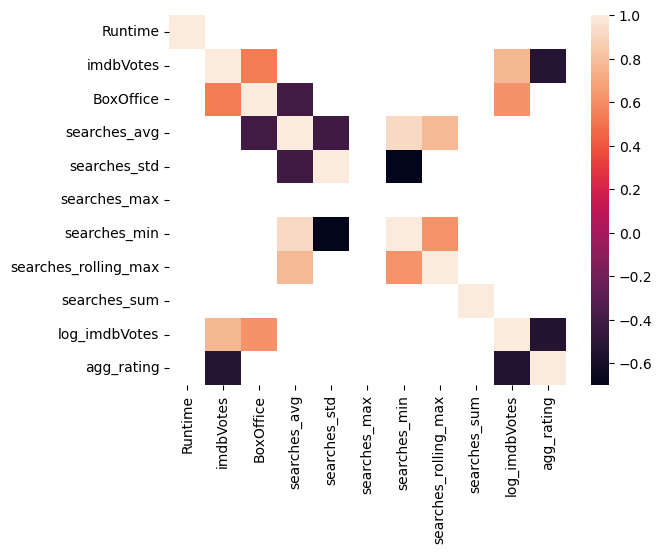

In [759]:
threshold = 0.4
corr_filtered = df_train4.corr()
corr_filtered = corr_filtered[abs(corr_filtered) > threshold]

sns.heatmap(corr_filtered,
        xticklabels=corr_filtered.columns,
        yticklabels=corr_filtered.columns)

In [760]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X2_train = df_train4.drop(["searches_min", "searches_max"], axis=1)
# X2_train["f1"] = X2_train["searches_avg"] ** 0.5 /  (X2_train["searches_std"] ** 0.02)
# X2_train["f2"] = X2_train["log_imdbVotes"] ** 2 / X2_train["f1"] ** 0.5
# X2_train["f3"] = X2_train["log_imdbVotes"] ** 2 / X2_train["searches_rolling_max"] ** 0.5
# X2_train["f4"] = (X2_train["f2"] * X2_train["f3"])

X2_test =  df_test4.drop(["searches_min", "searches_max"], axis=1)

# X2_test["f1"] = X2_test["searches_avg"] ** 0.5 /  (X2_test["searches_std"] ** 0.02)
# X2_test["f2"] = X2_test["log_imdbVotes"] ** 2 / X2_test["f1"] ** 0.5
# X2_test["f3"] = X2_test["log_imdbVotes"] ** 2 / X2_test["searches_rolling_max"] ** 0.5
# X2_test["f4"] = (X2_test["f2"] * X2_test["f3"])


X2_train = X2_train.fillna(X2_train.median())
X2_test = X2_test.fillna(X2_test.median())
# print(X2_train.count())
# print(X2_test.count())
# X2_train = X2_train.dropna()

y2_train = X2_train.pop("BoxOffice")
y2_test = X2_test.pop("BoxOffice")


# X1_test = df_test[["Runtime", "imdbRating", "log_imdbVotes", "imdbVotes", "Metascore", "Rotten Tomatoes"]].copy()

# X1_train = X1_train.dropna() 
# X1_test = X1_test.dropna()
# print(X1_train.corr())
# y1_train = X1_train.pop("Rotten Tomatoes")
# y1_test = X1_test.pop("Rotten Tomatoes")
# # X1 = X1.drop("imdbRating", axis=1)


reg2 = linear_model.LinearRegression()
reg2.fit(X2_train, y2_train)

reg2.score(X2_test, y2_test)

0.24814321686494056

In [761]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import QuantileTransformer


import lightgbm as lgbm
import xgboost as xg

#generic function to fit model and return metrics for every algorithm
def models(x, x_train, x_test, y_train, y_test):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(
        regressor=x,
#         transformer=QuantileTransformer(n_quantiles=100, output_distribution='normal')
    )
    regr_trans.fit(x_train, y_train)
    yhat = regr_trans.predict(x_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)

algo=[GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor(), DecisionTreeRegressor(), linear_model.LinearRegression()]
score=[]
for a in algo:
    score.append(models(a, X2_train, X2_test, y2_train, y2_test))

#Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])


,Model,Score,MAE,RMSE
0,GradientBoostingRegressor,0.056,53487827.92,69678105.51
1,LGBMRegressor,0.187,46847866.20,64642310.76
2,XGBRFRegressor,0.101,46975977.73,67989830.31
3,DecisionTreeRegressor,-0.460,57661647.27,86651566.11
4,LinearRegression,0.248,42078198.91,62176397.43


In [762]:
# Add one hot categorical variables

X3_train = X2_train.merge(df_cat2, how='left', left_index=True, right_index=True)
X3_test = X2_test.merge(df_cat2, how='left', left_index=True, right_index=True)
y3_train = y2_train.copy()
y3_test = y2_test.copy()
reg3 = linear_model.LinearRegression()
reg3.fit(X3_train, y3_train)

reg3.score(X3_test, y3_test)

0.4437974715890398

In [763]:
algo=[GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor(), DecisionTreeRegressor(), linear_model.LinearRegression()]
score=[]
for a in algo:
    score.append(models(a, X3_train, X3_test, y3_train, y3_test))

#Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])

,Model,Score,MAE,RMSE
0,GradientBoostingRegressor,0.057,51965935.73,69648880.95
1,LGBMRegressor,0.354,46807545.79,57619263.85
2,XGBRFRegressor,0.249,46346155.36,62128488.60
3,DecisionTreeRegressor,0.241,50154615.91,62472964.54
4,LinearRegression,0.444,36623486.64,53477915.81


In [764]:
# Hyper-parameter selection with grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45, 20],  
              'max_depth': [0, 20, 40],
              'reg_lambda' :[0.26, 0.25, 0.2, 0]
             }
                
grid = GridSearchCV(lgbm.LGBMRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1)
regr_trans = TransformedTargetRegressor(regressor=grid,
#                                         transformer=QuantileTransformer(n_quantiles=80, output_distribution='normal')
                                       )

# fitting the model for grid search 
grid_result=regr_trans.fit(X3_train, y3_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = lgbm.LGBMRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
regr_trans = TransformedTargetRegressor(
    regressor=best_model, 
#     transformer=QuantileTransformer(output_distribution='normal')
)
regr_trans.fit(X3_train, y3_train)
yhat = regr_trans.predict(X3_test)

#evaluate metrics
r2_score(y3_test, yhat), mean_absolute_error(y3_test, yhat), np.sqrt(mean_squared_error(y3_test, yhat))


Fitting 5 folds for each of 84 candidates, totalling 420 fits
{'max_depth': 0, 'n_estimators': 45, 'reg_lambda': 0.2}


(0.3043168914645379, 46288467.993172534, 59808611.918925375)

[CV 1/5] END max_depth=0, n_estimators=100, reg_lambda=0.25;, score=-0.355 total time=   0.0s
[CV 1/5] END max_depth=0, n_estimators=60, reg_lambda=0.2;, score=-0.229 total time=   0.0s
[CV 2/5] END max_depth=0, n_estimators=60, reg_lambda=0.2;, score=0.576 total time=   0.0s
[CV 4/5] END max_depth=0, n_estimators=55, reg_lambda=0.25;, score=0.440 total time=   0.0s
[CV 5/5] END max_depth=0, n_estimators=55, reg_lambda=0.25;, score=0.342 total time=   0.0s
[CV 5/5] END max_depth=0, n_estimators=45, reg_lambda=0.26;, score=0.332 total time=   0.0s
[CV 1/5] END max_depth=0, n_estimators=45, reg_lambda=0.25;, score=-0.154 total time=   0.0s
[CV 2/5] END max_depth=0, n_estimators=45, reg_lambda=0.25;, score=0.582 total time=   0.0s
[CV 3/5] END max_depth=0, n_estimators=45, reg_lambda=0.25;, score=0.816 total time=   0.0s
[CV 5/5] END max_depth=20, n_estimators=100, reg_lambda=0.26;, score=0.353 total time=   0.0s
[CV 1/5] END max_depth=20, n_estimators=100, reg_lambda=0.25;, score=-0.355 

[CV 5/5] END max_depth=0, n_estimators=100, reg_lambda=0.26;, score=0.353 total time=   0.0s
[CV 3/5] END max_depth=0, n_estimators=100, reg_lambda=0.2;, score=0.788 total time=   0.0s
[CV 5/5] END max_depth=0, n_estimators=100, reg_lambda=0.2;, score=0.353 total time=   0.0s
[CV 3/5] END max_depth=0, n_estimators=80, reg_lambda=0.26;, score=0.801 total time=   0.0s
[CV 3/5] END max_depth=0, n_estimators=80, reg_lambda=0.25;, score=0.801 total time=   0.0s
[CV 5/5] END max_depth=0, n_estimators=80, reg_lambda=0.2;, score=0.363 total time=   0.0s
[CV 1/5] END max_depth=0, n_estimators=60, reg_lambda=0.25;, score=-0.228 total time=   0.0s
[CV 3/5] END max_depth=0, n_estimators=60, reg_lambda=0.2;, score=0.819 total time=   0.0s
[CV 4/5] END max_depth=0, n_estimators=60, reg_lambda=0.2;, score=0.447 total time=   0.0s
[CV 5/5] END max_depth=0, n_estimators=55, reg_lambda=0.26;, score=0.342 total time=   0.0s
[CV 1/5] END max_depth=0, n_estimators=55, reg_lambda=0.25;, score=-0.198 total t

[CV 4/5] END max_depth=0, n_estimators=100, reg_lambda=0.26;, score=0.425 total time=   0.0s
[CV 4/5] END max_depth=0, n_estimators=100, reg_lambda=0.2;, score=0.414 total time=   0.0s
[CV 4/5] END max_depth=0, n_estimators=100, reg_lambda=0;, score=0.426 total time=   0.0s
[CV 4/5] END max_depth=0, n_estimators=80, reg_lambda=0.26;, score=0.446 total time=   0.0s
[CV 1/5] END max_depth=0, n_estimators=80, reg_lambda=0.2;, score=-0.285 total time=   0.0s
[CV 4/5] END max_depth=0, n_estimators=80, reg_lambda=0.2;, score=0.439 total time=   0.0s
[CV 3/5] END max_depth=0, n_estimators=60, reg_lambda=0.26;, score=0.819 total time=   0.0s
[CV 3/5] END max_depth=0, n_estimators=60, reg_lambda=0.25;, score=0.819 total time=   0.0s
[CV 5/5] END max_depth=0, n_estimators=60, reg_lambda=0.2;, score=0.354 total time=   0.0s
[CV 1/5] END max_depth=0, n_estimators=60, reg_lambda=0;, score=-0.280 total time=   0.0s
[CV 2/5] END max_depth=0, n_estimators=55, reg_lambda=0.25;, score=0.573 total time= 

[CV 1/5] END max_depth=0, n_estimators=100, reg_lambda=0.26;, score=-0.340 total time=   0.0s
[CV 5/5] END max_depth=0, n_estimators=51, reg_lambda=0.26;, score=0.335 total time=   0.0s
[CV 1/5] END max_depth=0, n_estimators=51, reg_lambda=0.25;, score=-0.180 total time=   0.0s
[CV 2/5] END max_depth=0, n_estimators=51, reg_lambda=0.25;, score=0.569 total time=   0.0s
[CV 3/5] END max_depth=0, n_estimators=51, reg_lambda=0.25;, score=0.828 total time=   0.0s
[CV 1/5] END max_depth=0, n_estimators=20, reg_lambda=0.26;, score=0.068 total time=   0.0s
[CV 2/5] END max_depth=0, n_estimators=20, reg_lambda=0.26;, score=0.518 total time=   0.0s
[CV 3/5] END max_depth=0, n_estimators=20, reg_lambda=0.26;, score=0.718 total time=   0.0s
[CV 4/5] END max_depth=0, n_estimators=20, reg_lambda=0.26;, score=0.359 total time=   0.0s
[CV 4/5] END max_depth=0, n_estimators=20, reg_lambda=0.25;, score=0.359 total time=   0.0s
[CV 5/5] END max_depth=0, n_estimators=20, reg_lambda=0.25;, score=0.293 tota